In [3]:
from IPython.display import display, Markdown, Latex

from analyse import deviation
from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4600, 5200, 25)
p = Page(ticker=Ticker.CAC1PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)
var = deviation(close=4963, volatility=18.58, period=3, precision=0)  # mercredi à l'ouverture
print('{}'.format(var))
sd = [var['1']['min'], var['1']['max']]
print('Variation : {}'.format(var['1']))
g.sdeviation = sd

{'1': {'min': 4862.0, 'max': 5064.0}, '2': {'min': 4761.0, 'max': 5165.0}, 'sd': 101.0}
Variation : {'min': 4862.0, 'max': 5064.0}


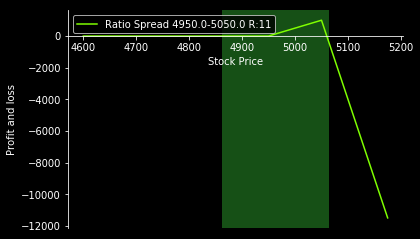

Cost-Butterfly : 0.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4950,long,1,418,41.8
Call,5050,short,11,-418,-3.8


4862.0 -> 0.0
5064.0 -> -400.0


In [4]:
rs = RatioSpread(call[4950], call[5050])
g.profit_strategy(rs)
print('Cost-Butterfly : {:0.02f}€'.format(rs.cost()))
g.display_summary(rs)
max(rs.payoff(g.sT))

import numpy as np
v = rs.payoff(np.array(g.sdeviation), 'long')
for strike, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(strike, pv))

In [ ]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

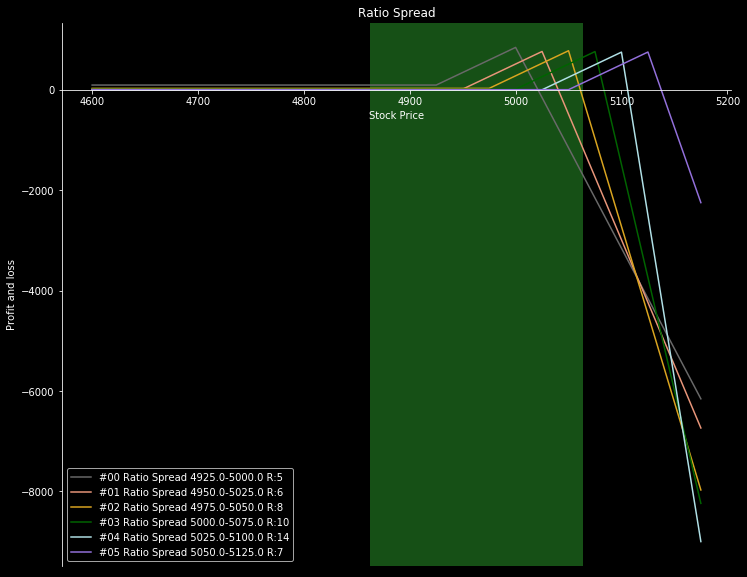

In [5]:
rss = RatioSpread.explorator(call.values(), step=75)
g.profit_rainbow(rss[6:], 'long', title='Ratio Spread')

In [ ]:
rss = RatioSpread.explorator(put.values(), step=50)
g.profit_rainbow(rss, 'long', title='Ratio Spread')